# **Customer Relationship Management Analysis**

Problem Statement:Customer relationship management (CRM) is a process in which a business or other organization administers its interactions with customers, typically using data analysis to study large amounts of information.An e-commerce company wants to segment its customers and determine marketing strategies according to these segments.


* InvoiceNo: Invoice number that consists 6 digits. If this code starts with letter 'C', it indicates a cancellation.
* StockCode: Product code that consists 5 digits.
* Description: Product name.
* Quantity: The quantities of each product per transaction.
* InvoiceDate: Represents the day and time when each transaction was generated.
* UnitPrice: Product price per unit.
* CustomerID: Customer number that consists 5 digits. Each customer has a unique customer ID.
* Country: Name of the country where each customer resides.










In [ ]:
!pip install Lifetimes==0.2.2.2 squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import datetime as dt
import plotly.graph_objs as go
from plotly.offline import plot, iplot
import sklearn
from sklearn.cluster import KMeans
from sklearn import metrics
import plotly.express as px
from sklearn.model_selection import train_test_split
import squarify 
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
#load and read the dataset
df=pd.read_csv("data.csv",encoding= 'unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
# aborted operations
df[df["InvoiceNo"].str.contains("C", na=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [ ]:
#dropping the aborted operation
df_aborted_op= df[~df["InvoiceNo"].str.contains("C", na=False)]
df_aborted_op

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
df=df_aborted_op.copy()

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
# df.to_csv("cleaned_data.csv")

In [ ]:
pd.set_option('display.max_columns', None)
df
#displaying all the columns

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.shape
#get the shape

(532621, 8)

In [ ]:
df.info()
#get the info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532621 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    532621 non-null  object 
 1   StockCode    532621 non-null  object 
 2   Description  531167 non-null  object 
 3   Quantity     532621 non-null  int64  
 4   InvoiceDate  532621 non-null  object 
 5   UnitPrice    532621 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      532621 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.6+ MB


In [ ]:
df.dtypes
#datatypes of all the columns

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [ ]:
df.describe()
#statistical description of numerical data is displayed

,Quantity,UnitPrice,CustomerID
count,532621.000000,532621.000000,397924.000000
mean,10.239972,3.847621,15294.315171
std,159.593551,41.758023,1713.169877
min,-9600.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [ ]:
df.describe(include="all").T
#statistical description of both numerical and categorical data

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
InvoiceNo,532621,22064,573585,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,532621,4059,85123A,2271,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,531167,4207,WHITE HANGING HEART T-LIGHT HOLDER,2327,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,532621.0,NaN,NaN,NaN,10.239972,159.593551,-9600.0,1.0,3.0,10.0,80995.0
InvoiceDate,532621,19990,10/31/2011 14:41,1114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitPrice,532621.0,NaN,NaN,NaN,3.847621,41.758023,-11062.06,1.25,2.08,4.13,13541.33
CustomerID,397924.0,NaN,NaN,NaN,15294.315171,1713.169877,12346.0,13969.0,15159.0,16795.0,18287.0
Country,532621,38,United Kingdom,487622,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.sort_values(by='UnitPrice', ascending=False).head()
#most expensive products

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
15017,537632,AMAZONFEE,AMAZON FEE,1,12/7/2010 15:08,13541.33,NaN,United Kingdom
299982,A563185,B,Adjust bad debt,1,8/12/2011 14:50,11062.06,NaN,United Kingdom
173382,551697,POST,POSTAGE,1,5/3/2011 13:46,8142.75,16029.0,United Kingdom
297723,562955,DOT,DOTCOM POSTAGE,1,8/11/2011 10:14,4505.17,NaN,United Kingdom
268028,560373,M,Manual,1,7/18/2011 12:30,4287.63,NaN,United Kingdom


In [ ]:
df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T

,0.00,0.05,0.50,0.95,0.99,1.00
Quantity,-9600.00,1.00,3.00,30.00,100.00,80995.00
UnitPrice,-11062.06,0.42,2.08,9.95,16.98,13541.33
CustomerID,12346.00,12627.00,15159.00,17912.00,18211.00,18287.00


In [ ]:

# There are negative values in UnitPrice and Quantity because of cancelled orders.

In [ ]:
df.describe([0.01,0.25,0.50,0.75,0.99]).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
Quantity,532621.0,10.239972,159.593551,-9600.00,1.00,1.00,3.00,10.00,100.00,80995.00
UnitPrice,532621.0,3.847621,41.758023,-11062.06,0.19,1.25,2.08,4.13,16.98,13541.33
CustomerID,397924.0,15294.315171,1713.169877,12346.00,12415.00,13969.00,15159.00,16795.00,18211.00,18287.00


In [ ]:
#Points to be notes:
#Quantity and Unit Price should be multiplied to create Total Price.
#Missing values in Customer ID and Description.
#InvoiceDate should be datetime, not object.

In [ ]:
### EDA:

In [ ]:

df.isnull().sum()
#checking for the missing values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134697
Country             0
dtype: int64

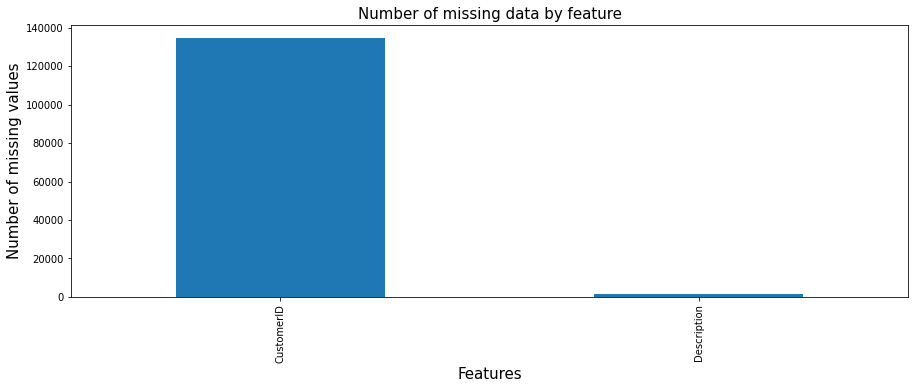

In [ ]:
# Plot missing values
plt.figure(figsize=(15,5))
missing= df.isnull().sum()
missing= missing[missing > 0]
missing.sort_values(ascending= False, inplace=True)
plt.xlabel("Features", fontsize=15)
plt.ylabel("Number of missing values", fontsize=15)
plt.title("Number of missing data by feature", fontsize=15)
missing.plot(kind="bar")

In [ ]:
df.dropna(inplace=True)
print('Missing Values: {}'.format(df.isnull().sum().sum()))
#dealing with missing values

Missing Values: 0


In [ ]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [ ]:
def cat_summary(df, col_name, plot=False):
    print(pd.DataFrame({col_name: df[col_name].value_counts(),
                        "Ratio": 100 * df[col_name].value_counts() / len(df)}))
cat_summary(df, "Country", plot=True)
# categorical value country with ratio

                      Country      Ratio
United Kingdom         354345  89.048411
Germany                  9042   2.272293
France                   8342   2.096380
EIRE                     7238   1.818940
Spain                    2485   0.624491
Netherlands              2363   0.593832
Belgium                  2031   0.510399
Switzerland              1842   0.462902
Portugal                 1462   0.367407
Australia                1185   0.297796
Norway                   1072   0.269398
Italy                     758   0.190489
Channel Islands           748   0.187976
Finland                   685   0.172143
Cyprus                    614   0.154301
Sweden                    451   0.113338
Austria                   398   0.100019
Denmark                   380   0.095496
Poland                    330   0.082930
Japan                     321   0.080669
Israel                    248   0.062323
Unspecified               244   0.061318
Singapore                 222   0.055790
Iceland         

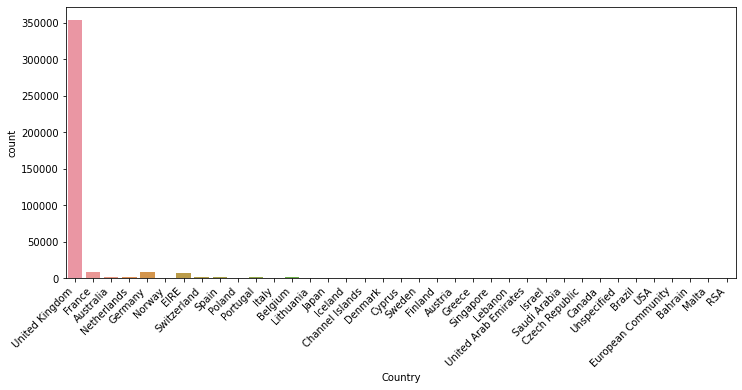

In [ ]:
fig_dim = (12, 5)
fig, ax = plt.subplots(figsize=fig_dim)
plt.xticks(rotation = 45, ha = 'right')
sns.countplot(x=df["Country"], data=df)

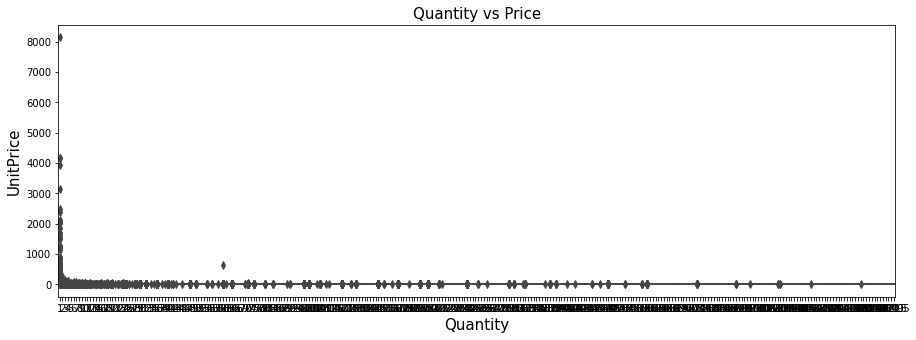

In [ ]:
# boxplot of quantity and unitprice
plt.figure(figsize=(15,5))
sns.boxplot(y="UnitPrice", x="Quantity", data= df)
plt.title("Quantity vs Price", fontsize=15)
plt.xlabel("Quantity", fontsize=15)
plt.ylabel("UnitPrice", fontsize=15)
plt.show()

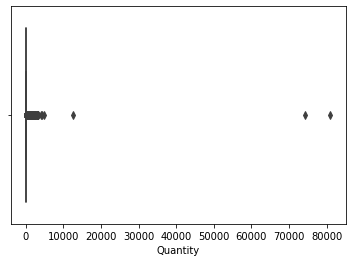

In [ ]:
sns.boxplot( x="Quantity", data= df)

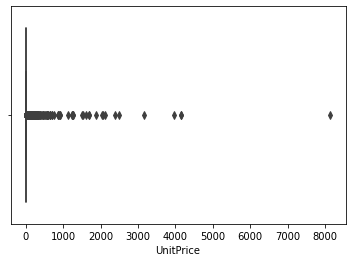

In [ ]:
sns.boxplot(x="UnitPrice",data= df)

In [ ]:
# Treating outliers
def outlier_thresholds(dataframe, variable):
    Q1 = dataframe[variable].quantile(0.25)
    Q3 = dataframe[variable].quantile(0.75)
    IQR = Q3 - Q1
    up_limit = Q3 + 1.5 * IQR
    low_limit = Q1 - 1.5 * IQR
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    
replace_with_thresholds(df, "Quantity")
replace_with_thresholds(df, "UnitPrice")

In [ ]:
outlier_thresholds(df, "Quantity")

(-13.0, 27.0)

In [ ]:
outlier_thresholds(df, "UnitPrice")

(-2.5, 7.5)

In [ ]:
replace_with_thresholds(df, "Quantity")


In [ ]:
replace_with_thresholds(df, "UnitPrice")

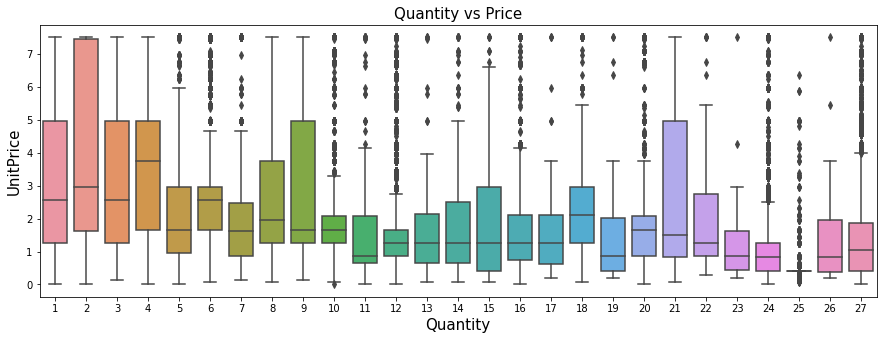

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(y="UnitPrice", x="Quantity", data= df)
plt.title("Quantity vs Price", fontsize=15)
plt.xlabel("Quantity", fontsize=15)
plt.ylabel("UnitPrice", fontsize=15)

plt.show()
#boxplot of Quantity vs Price

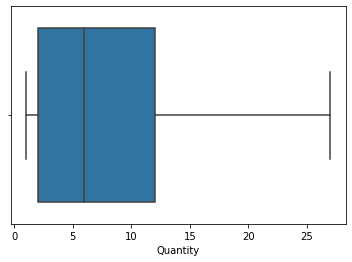

In [ ]:
sns.boxplot( x="Quantity", data= df)

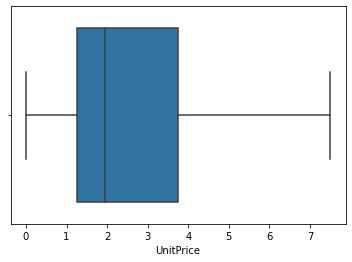

In [ ]:
sns.boxplot(x="UnitPrice",data= df)

In [ ]:
df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T

,0.00,0.05,0.50,0.95,0.99,1.00
Quantity,1.0,1.00,6.00,27.0,27.0,27.0
UnitPrice,0.0,0.42,1.95,7.5,7.5,7.5
CustomerID,12346.0,12627.00,15159.00,17912.0,18211.0,18287.0


In [ ]:
# all the outliers has been treated.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]), <a list of 37 Text major ticklabel objects>)

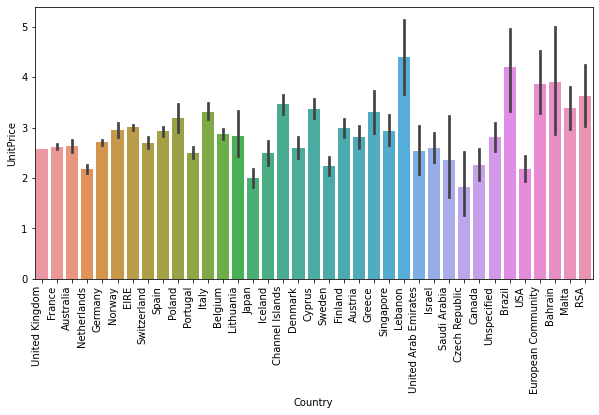

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(y="UnitPrice", x="Country", data= df)
plt.xticks(rotation = 90, ha = 'right')

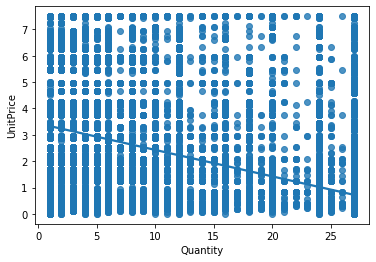

In [ ]:
sns.regplot(y="UnitPrice",x="Quantity", data= df, scatter= True, fit_reg= True)

In [ ]:
#This method is used to plot data and a linear regression model fit. There are a number of mutually exclusive options for estimating the regression model.Here the datapoints are away ang the regression line doesn't fit properly.Linear regression won't be suggested for this model.

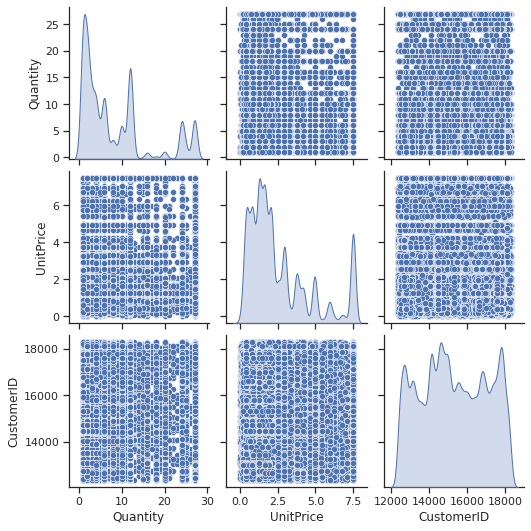

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,kind= "scatter", diag_kind="kde")
plt.show()

In [ ]:
#To plot multiple pairwise bivariate distributions in a dataset,  pairplot()  is used.Here, no interestings patterns are found.

In [ ]:
#product with its quantity
df_product = df.groupby("Description").agg({"Quantity":"count"})
df_product.reset_index(inplace=True)
df_product

,Description,Quantity
0,4 PURPLE FLOCK DINNER CANDLES,39
1,50'S CHRISTMAS GIFT BAG LARGE,109
2,DOLLY GIRL BEAKER,138
3,I LOVE LONDON MINI BACKPACK,70
4,I LOVE LONDON MINI RUCKSACK,1
...,...,...
3872,ZINC T-LIGHT HOLDER STARS SMALL,238
3873,ZINC TOP 2 DOOR WOODEN SHELF,9
3874,ZINC WILLIE WINKIE CANDLE STICK,192
3875,ZINC WIRE KITCHEN ORGANISER,12


In [ ]:
df["StockCode"].nunique()
# unique product

3665

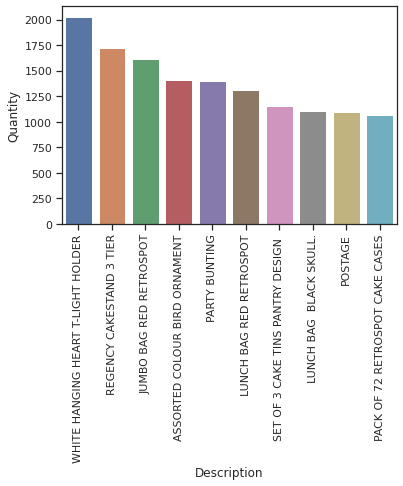

In [ ]:
top_products= df_product.sort_values(by="Quantity",ascending=False).head(10)

sns.barplot(x="Description", y="Quantity", data=top_products)
plt.xticks(rotation=90)
plt.show()
# Top 10 Products

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]), <a list of 37 Text major ticklabel objects>)

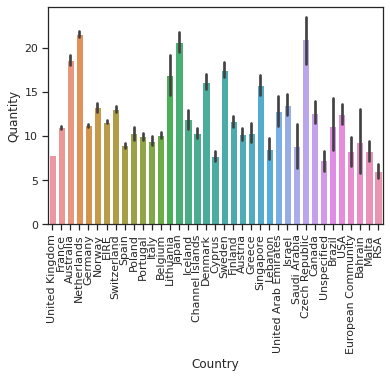

In [ ]:
sns.barplot(data=df, x="Country",y="Quantity")
plt.xticks(rotation=90)

In [ ]:
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
#Quantity and Unit Price should be multiplied to create Total Price.

In [ ]:
df.describe()
#statistical description of numerical data is displayed
#new column TotalPrice is added

,Quantity,UnitPrice,CustomerID,TotalPrice
count,532621.000000,532621.000000,397924.000000,532621.000000
mean,10.239972,3.847621,15294.315171,19.985244
std,159.593551,41.758023,1713.169877,270.574241
min,-9600.000000,-11062.060000,12346.000000,-11062.060000
25%,1.000000,1.250000,13969.000000,3.750000
50%,3.000000,2.080000,15159.000000,9.900000
75%,10.000000,4.130000,16795.000000,17.700000
max,80995.000000,13541.330000,18287.000000,168469.600000


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,532621.0,10.239972,159.593551,-9600.00,1.00,3.00,10.00,80995.00
UnitPrice,532621.0,3.847621,41.758023,-11062.06,1.25,2.08,4.13,13541.33
CustomerID,397924.0,15294.315171,1713.169877,12346.00,13969.00,15159.00,16795.00,18287.00
TotalPrice,532621.0,19.985244,270.574241,-11062.06,3.75,9.90,17.70,168469.60


In [ ]:
#Customer Segmentation With RFM

In [ ]:
#recency: the difference between today and the customer's last purchase date, in days
#frequency: customer's shopping frequency
#monetary: total money paid by the customer


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print(df['InvoiceDate'].max())
# Determining the analysis date for the recency

2011-12-09 12:50:00


In [ ]:
today_date = dt.datetime(2011,12,11)
# assign "today's date" as 2 days after the last date of purchase to make sure that none of the Recency values become zero

In [ ]:
#the number of days between today_date and the last purchase date of this customer is Recency
#the number of unique invoices of this customer is Frequency
#the sum of TotalPrice is this customer's Monetary

In [ ]:
rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda invoice_date: (today_date - invoice_date.max()).days,
                                    'InvoiceNo': lambda invoice: invoice.nunique(),
                                    'TotalPrice': lambda total_price: total_price.sum()})

rfm

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,326,1,77183.60
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,8,2,178.05


In [ ]:
rfm.columns = ['recency','frequency','monetary']
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,4339.0,93.041484,100.007757,1.0,18.000,51.00,142.50,374.00
frequency,4339.0,4.271952,7.705493,1.0,1.000,2.00,5.00,210.00
monetary,4339.0,2053.793018,8988.248381,0.0,307.245,674.45,1661.64,280206.02


In [ ]:
rfm = rfm[rfm["monetary"] > 0]
rfm.describe().T
# monetary, the min value of the total money paid can't be 0; remove them from the data

,count,mean,std,min,25%,50%,75%,max
recency,4338.0,93.059474,100.012264,1.00,18.000,51.000,142.75,374.00
frequency,4338.0,4.272706,7.706221,1.00,1.000,2.000,5.00,210.00
monetary,4338.0,2054.266460,8989.230441,3.75,307.415,674.485,1661.74,280206.02


In [ ]:
rfm.columns = ['recency','frequency','monetary']
rfm = rfm.reset_index()
rfm.head()

,CustomerID,recency,frequency,monetary
0,12346.0,326,1,77183.60
1,12347.0,3,7,4310.00
2,12348.0,76,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,311,1,334.40


In [ ]:
#Generating RFM Scores

In [ ]:
# recency_score
rfm["recency_score"], rec_bins = pd.qcut(rfm["recency"], 5, labels=[5, 4, 3, 2, 1], retbins=True)
# frequency_score
rfm["frequency_score"], freq_bins = pd.qcut(rfm["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5], retbins=True)
# monetary_score
rfm["monetary_score"], mon_bins = pd.qcut(rfm["monetary"], 5, labels=[1, 2, 3, 4, 5], retbins=True)



In [ ]:
# Collect these bin values for later inference 
rec_bins, freq_bins, mon_bins, rfm["recency_score"].cat.categories.values

(array([  1. ,  13.8,  33. ,  72. , 180. , 374. ]),
 array([1.0000e+00, 8.6840e+02, 1.7358e+03, 2.6032e+03, 3.4706e+03,
        4.3380e+03]),
 array([3.7500000e+00, 2.5019400e+02, 4.9009600e+02, 9.4227600e+02,
        2.0584260e+03, 2.8020602e+05]),
 array([5, 4, 3, 2, 1]))

In [ ]:
#A recency score is assigned to each customer based on date of most recent purchase. The score is generated by binning the recency values into a number of categories (default is 5). For example, if you use four categories, the customers with the most recent purchase dates receive a recency ranking of 4, and those with purchase dates in the distant past receive a recency ranking of 1.

In [ ]:
#A frequency ranking is assigned in a similar way. Customers with high purchase frequency are assigned a higher score (4 or 5) and those with lowest frequency are assigned a score 1.

In [ ]:
#Monetary score is assigned on the basis of the total revenue generated by the customer in the period under consideration for the analysis. Customers with highest revenue/order amount are assigned a higher score while those with lowest revenue are assigned a score of 1.

In [ ]:
#  RFM Score
rfm["RFM_SCORE"] = (rfm["frequency_score"].astype(str) +
                    rfm["monetary_score"].astype(str))

In [ ]:
rfm["RFM_SCORE"]

0       15
1       55
2       44
3       14
4       12
        ..
4333    21
4334    21
4335    31
4336    55
4337    44
Name: RFM_SCORE, Length: 4338, dtype: object

In [ ]:
#RFM score is generated which is simply the three individual scores concatenated into a single value.
#The customers with the highest RFM scores are most likely to respond to an offer.

In [ ]:
#Segmentation

In [ ]:
seg_mapping = {r'[1-2][1-2]': 'hibernating',
           r'[1-2][3-4]': 'at_Risk',
           r'[1-2]5': 'cant_loose',
           r'3[1-2]': 'about_to_sleep',
           r'33': 'need_attention',
           r'[3-4][4-5]': 'loyal_customers',
           r'41': 'promising',
           r'51': 'new_customers',
           r'[4-5][2-3]': 'potential_loyalists',
           r'5[4-5]': 'champions'}

#the following dict has been made according to the famous RFM graphic

rfm['segment'] = rfm['RFM_SCORE'].replace(seg_mapping, regex=True)


In [ ]:
rfm.head()

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
0,12346.0,326,1,77183.60,1,1,5,15,cant_loose
1,12347.0,3,7,4310.00,5,5,5,55,champions
2,12348.0,76,4,1797.24,2,4,4,44,loyal_customers
3,12349.0,19,1,1757.55,4,1,4,14,at_Risk
4,12350.0,311,1,334.40,1,1,2,12,hibernating


In [ ]:
# group RFM mean and frequency values according to segments
rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(["mean",'std',"count",'max','min'])

recency                             frequency  \
                           mean         std count  max min       mean   
segment                                                                 
about_to_sleep        99.218659   92.680433   343  374   2   2.139942   
at_Risk              119.130000   98.584127   400  373   1   1.367500   
cant_loose           116.689655  102.649578    29  337   3   1.517241   
champions             24.478992   34.377638   833  373   1  13.004802   
hibernating          158.222052  117.482264  1306  374   2   1.061256   
loyal_customers       56.535099   58.806654   755  367   1   3.754967   
need_attention        82.453333   76.862783   300  337   1   2.293333   
new_customers         83.500000  101.116270     2  155  12   6.500000   
potential_loyalists   62.946328   68.888833   354  314   1   3.951977   
promising            107.812500   75.595607    16  253   3   3.500000   

                                                  monetary                \
                           std count  max min         mean           std   
segment                                                                    
about_to_sleep        0.347433   343    3   2   309.987726    109.998945   
at_Risk               0.482728   400    2   1   852.776900    361.663597   
cant_loose            0.508548    29    2   1  6105.146241  13783.760390   
champions            14.400937   833  210   6  7031.230456  18490.577554   
hibernating           0.239891  1306    2   1   236.789993    116.351568   
loyal_customers       0.993125   755    6   2  2224.161417   6535.246419   
need_attention        0.456051   300    3   2   683.047503    120.917417   
new_customers         0.707107     2    7   6   135.570000     92.701699   
potential_loyalists   1.072689   354    9   3   658.765483    175.873325   
promising             0.632456    16    5   3   189.323125     56.604288   

                                               
                    count        max      min  
segment                                        
about_to_sleep        343     487.99     6.90  
at_Risk               400    2044.37   490.52  
cant_loose             29   77183.60  2062.06  
champions             833  280206.02   954.42  
hibernating          1306     489.60     3.75  
loyal_customers       755  168472.50   942.34  
need_attention        300     942.26   490.22  
new_customers           2     201.12    70.02  
potential_loyalists   354     939.37   251.91  
promising              16     247.96    36.56

In [ ]:
seg= rfm["segment"].value_counts()

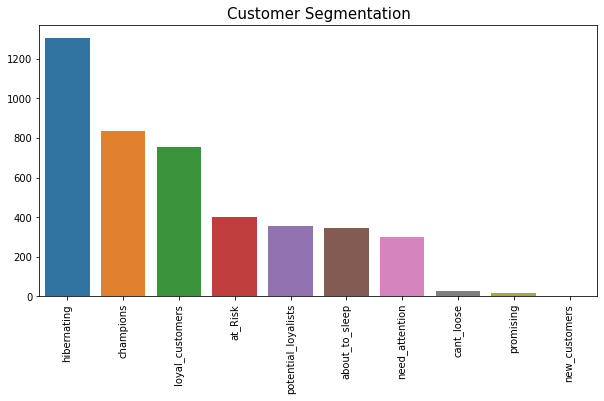

In [ ]:

plt.figure(figsize=(10,5))
sns.barplot(x=seg.index,y=seg.values)
plt.xticks(rotation=90)
plt.title('Customer Segmentation',fontsize=15)
plt.show()

In [ ]:
# Treemap Visualization
df_treemap = rfm.groupby('segment').agg('count').reset_index()
df_treemap.head()

,segment,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
0,about_to_sleep,343,343,343,343,343,343,343,343
1,at_Risk,400,400,400,400,400,400,400,400
2,cant_loose,29,29,29,29,29,29,29,29
3,champions,833,833,833,833,833,833,833,833
4,hibernating,1306,1306,1306,1306,1306,1306,1306,1306


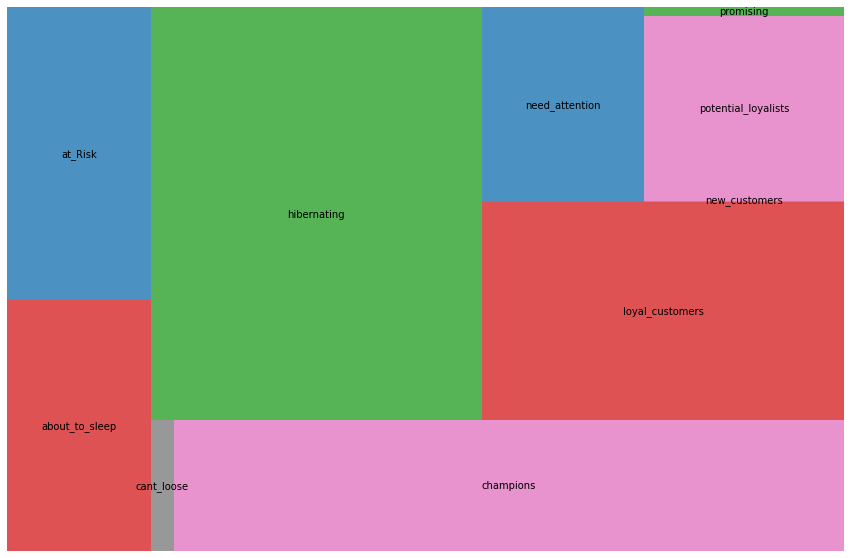

In [ ]:
fig, ax = plt.subplots(1, figsize = (15,10))

squarify.plot(sizes=df_treemap['RFM_SCORE'], 
              label=df_treemap['segment'], 
              alpha=.8,
              color=['tab:red', 'tab:blue', 'tab:gray', 'tab:pink', 'tab:green']
             )
plt.axis('off')
plt.show()


In [ ]:
data = go.Bar(y = pd.DataFrame(rfm['segment'].value_counts()).index,
              x = pd.DataFrame(rfm['segment'].value_counts())['segment'].values,
              name = str(pd.DataFrame(rfm['segment'].value_counts())['segment'].values),
              orientation='h')

layout = go.Layout(title={'text': "Number of Customer by Segments",
                          'y':0.9,
                          'x':0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'},
                
                   xaxis=dict(title='Customers'))

fig=go.Figure(data=data, layout=layout)
fig.update_xaxes(range=[0,1300])
iplot(fig)

In [ ]:
rfm[rfm["segment"] == "need_attention"].head()

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
14,12365.0,292,2,322.94,1,3,3,33,need_attention
31,12407.0,236,2,440.56,2,3,3,33,need_attention
34,12410.0,309,2,529.23,1,3,3,33,need_attention
36,12413.0,237,2,496.50,2,3,3,33,need_attention
40,12421.0,174,2,321.86,5,3,3,33,need_attention


In [ ]:
marketing_df = pd.DataFrame()
marketing_df["cant_loose"] = rfm[rfm["segment"] == "cant_loose"].index

In [ ]:
marketing_df

,cant_loose
0,30
1,33
2,52
3,55
4,84
5,121
6,220
7,223
8,506
9,509


In [ ]:
marketing_df.to_csv("cant_loose.csv")

In [ ]:
#K-Means Clustering

In [ ]:
#Elbow method

In [ ]:
kmeans_data = rfm.loc[:,['recency_score','frequency_score']]

inertia=[]
k = [1,2,3,4,5,6,7,8,9]

In [ ]:
for i in k:
    kmean=KMeans(n_clusters=i)
    kmean.fit(kmeans_data)
    inertia.append(kmean.inertia_)

In [ ]:
data = go.Scatter(x=k, y=inertia, mode='lines+markers',marker=dict(size=12))

In [ ]:
layout = go.Layout(title={'text': "Elbow Method",
                          'y':0.9,
                          'x':0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'},
                   width=600,
                   height=400,
                   xaxis = dict(title='Number of Clusters'),
                   yaxis =dict(title='Sum of Squared Distance'))

fig =go.Figure(data=data,layout=layout)
iplot(fig)

In [ ]:
#Silhouette Score

In [ ]:
#The point at which the elbow shape is created is 3, that is, our K value or an optimal number of clusters is 3. The model is trained on the dataset with 3 clusters.

In [ ]:
kmeans = KMeans(n_clusters = 3,random_state = 0)
kmeans.fit(kmeans_data)
print('Silhouette Score: {}'.format(round(metrics.silhouette_score(kmeans_data, kmeans.labels_),3)))

Silhouette Score: 0.438


In [ ]:
rfm['k_means_segment'] = kmeans.labels_
rfm['k_means_segment'] = rfm['k_means_segment'].astype(str)
rfm[['recency','monetary','frequency','k_means_segment']].groupby('k_means_segment').agg({'mean','std','max','min'})


recency                          monetary         \
                       mean  min  max        std         mean    min   
k_means_segment                                                        
0                296.919966  236  374  43.825171   381.667917   3.75   
1                184.883843  158  286  22.006943  1747.054218  29.70   
2                198.459380  158  235  19.283932   412.944241   2.90   

                                       frequency                     
                      max          std      mean min  max       std  
k_means_segment                                                      
0                 7285.72   482.837239  1.383821   1   34  1.190262  
1                42888.83  2794.263944  5.656769   1  107  6.615178  
2                 4649.37   442.744858  1.308715   1    2  0.462305

In [ ]:
kmeans.labels_

array([0, 1, 0, ..., 2, 1, 2], dtype=int32)

In [ ]:

from re import template
data = go.Bar(y = pd.DataFrame(rfm['k_means_segment'].value_counts()).index,
              x = pd.DataFrame(rfm['k_means_segment'].value_counts())['k_means_segment'].values,
              name = str(pd.DataFrame(rfm['k_means_segment'].value_counts())['k_means_segment'].values),
              orientation='h')

layout = go.Layout(title={'text': "Number of Customer by K-Means Segments",
                          'y':0.9,
                          'x':0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'},
                   template='ggplot2',
                   xaxis =dict(title='Customers'))

fig=go.Figure(data=data, layout=layout)
fig.update_xaxes(range=[0,1800])
iplot(fig)
#Number of Customer by K-Means Segments

In [ ]:
for template in ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn"]:
    fig = px.scatter(data,
                    y = pd.DataFrame(rfm['k_means_segment'].value_counts()).index,
              x = pd.DataFrame(rfm['k_means_segment'].value_counts())['k_means_segment'].values,
              log_x=True, size_max=100,
                     template=template, title="Customer segmentation: '%s' theme" % template)
    fig.show()

In [ ]:
from plotly.subplots import make_subplots

In [ ]:

fig = make_subplots(rows=2,cols=3)

fig.add_trace(go.Box(y =rfm[rfm['k_means_segment']=='0']['recency'],showlegend=False,
                     name = '0',marker_color='green'),row=1,col=1)
fig.add_trace(go.Box(y =rfm[rfm['k_means_segment']=='1']['recency'],showlegend=False,
                     name = '1',marker_color='#EB1919'),row=1,col=2)
fig.add_trace(go.Box(y =rfm[rfm['k_means_segment']=='2']['recency'],showlegend=False,
                     name = '2',marker_color='#E8EB19'),row=1,col=3)
fig.add_trace(go.Box(y =rfm[rfm['k_means_segment']=='0']['frequency'],showlegend=False,
                     name = '0',marker_color='green'),row=2,col=1)
fig.add_trace(go.Box(y =rfm[rfm['k_means_segment']=='1']['frequency'],showlegend=False,
                     name = '1',marker_color='#EB1919'),row=2,col=2)
fig.add_trace(go.Box(y =rfm[rfm['k_means_segment']=='2']['frequency'],showlegend=False,
                     name = '2',marker_color='#E8EB19'),row=2,col=3)

fig.update_layout(title={'text': "Frequency & Recency by K-Means Segments",'y':0.9,'x':0.5,'xanchor': 'center',
        'yanchor': 'top'},template='plotly_dark')

fig.update_yaxes(title_text="Recency", row=1, col=1)
fig.update_yaxes(title_text="Frequency", row=2, col=1)
iplot(fig)
#Frequency and recency by Kmeans

In [ ]:
# Thus,customers are segmented and clustered using Kmeans-clustering

In [ ]:
#Principal component analysis

In [ ]:
X= rfm.drop(['segment','CustomerID','k_means_segment'], axis=1)
Y=rfm['k_means_segment']

In [ ]:
X

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
0,326,1,28.08,1,1,1,11
1,184,4,1929.88,4,4,5,45
2,249,3,482.57,2,4,3,43
3,311,1,301.90,1,1,2,12
4,263,5,651.91,2,5,4,54
...,...,...,...,...,...,...,...
2979,258,1,51.00,2,3,1,31
2980,278,1,174.50,2,3,2,32
2981,181,1,61.92,4,3,1,31
2982,170,7,839.13,5,5,4,54


In [ ]:

X.dtypes


recency               int64
frequency             int64
monetary            float64
recency_score      category
frequency_score    category
monetary_score     category
RFM_SCORE            object
dtype: object

In [ ]:
#scaling using StandardScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled

array([[ 1.53854750e+00, -4.30200763e-01, -4.68699684e-01, ...,
        -1.41397666e+00, -1.41397666e+00, -1.45581132e+00],
       [-7.75592567e-01,  2.13052491e-01,  5.38956442e-01, ...,
         7.06988328e-01,  1.41397666e+00,  7.94078902e-01],
       [ 2.83696900e-01, -1.36526048e-03, -2.27891169e-01, ...,
         7.06988328e-01,  0.00000000e+00,  6.61732419e-01],
       ...,
       [-8.24482850e-01, -4.30200763e-01, -4.50769784e-01, ...,
         0.00000000e+00, -1.41397666e+00, -1.32346484e-01],
       [-1.00374722e+00,  8.56305745e-01, -3.89702164e-02, ...,
         1.41397666e+00,  7.06988328e-01,  1.38963808e+00],
       [-4.82250869e-01, -4.30200763e-01, -1.33547258e-01, ...,
         0.00000000e+00,  7.06988328e-01,  6.61732419e-02]])

In [ ]:
X

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
0,326,1,28.08,1,1,1,11
1,184,4,1929.88,4,4,5,45
2,249,3,482.57,2,4,3,43
3,311,1,301.90,1,1,2,12
4,263,5,651.91,2,5,4,54
...,...,...,...,...,...,...,...
2979,258,1,51.00,2,3,1,31
2980,278,1,174.50,2,3,2,32
2981,181,1,61.92,4,3,1,31
2982,170,7,839.13,5,5,4,54


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
pca.fit(X_scaled)
pca.explained_variance_ratio_

array([5.87635897e-01, 1.77574882e-01, 1.30163839e-01, 6.21350459e-02,
       3.29683124e-02, 9.52202351e-03, 3.01915682e-32])

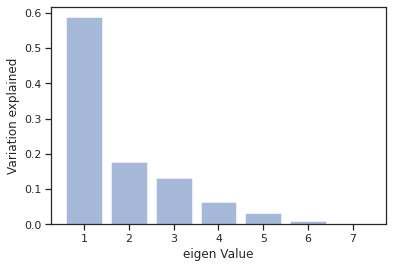

In [ ]:
plt.bar(list(range(1,8)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()
#plot against eigen values and explained_variance_ratio_

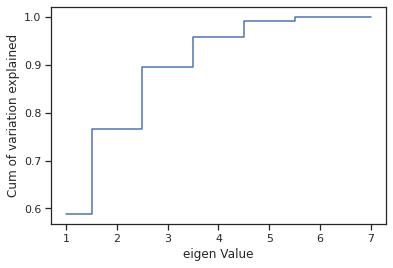

In [ ]:
plt.step(list(range(1,8)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [ ]:
# Dimensionality reduction

In [ ]:
# Dimensionality reduction is a task of reducing the features or columns in the dataset

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [ ]:
X_scaled.shape

(2984, 7)

In [ ]:
X_pca.shape
#shape after dimensionality reduction

(2984, 2)

In [ ]:
X_pca_df=pd.DataFrame(X_pca,columns=['PC1','PC2'])
X_pca_df
#this dataframe consists of PC1 and PC2

,PC1,PC2
0,-3.143422,0.862601
1,1.961287,-0.193428
2,0.159847,0.500502
3,-2.709738,0.882165
4,1.148913,1.011787
...,...,...
2979,-1.307424,0.044531
2980,-1.101800,0.341248
2981,-0.351247,-1.379177
2982,2.629986,-0.698848


In [ ]:
#Hierarchial clustering

In [ ]:
X= rfm.drop(['segment','CustomerID','k_means_segment'], axis=1)

In [ ]:
#normalize the data
from sklearn.preprocessing import normalize
data_scaled =normalize(X)
data_scaled = pd.DataFrame(data_scaled, columns=X.columns)
data_scaled.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
0,0.995730,0.003054,0.085767,0.003054,0.003054,0.003054,0.033598
1,0.094886,0.002063,0.995208,0.002063,0.002063,0.002578,0.023206
2,0.457083,0.005507,0.885842,0.003671,0.007343,0.005507,0.078934
3,0.717238,0.002306,0.696252,0.002306,0.002306,0.004612,0.027675
4,0.373006,0.007091,0.924587,0.002837,0.007091,0.005673,0.076587


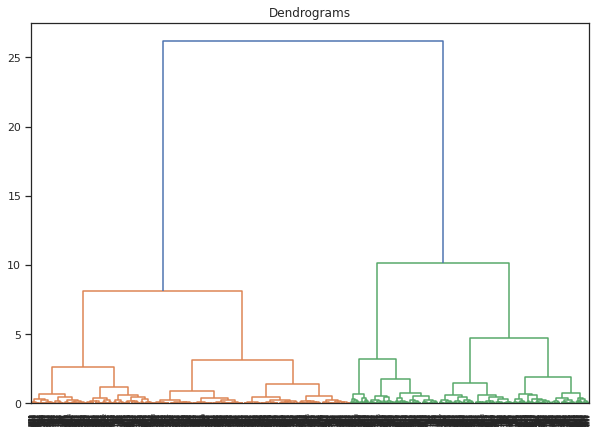

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
#Dendogram generation

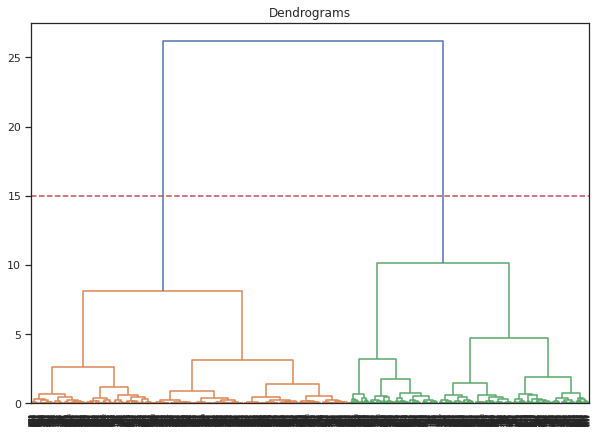

In [ ]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=15, color='r', linestyle='--')
# the line in the diagram helps us to find the clusters

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)
#Agglomerative Clustering

array([0, 1, 1, ..., 0, 1, 1])

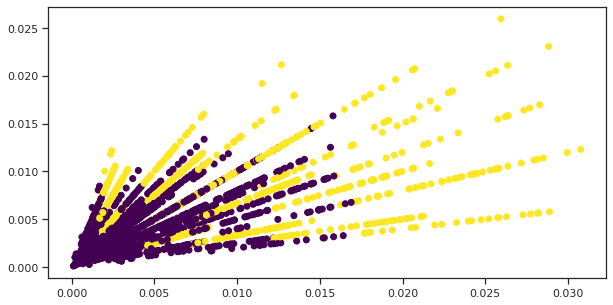

In [ ]:
plt.figure(figsize=(10, 5))  
plt.scatter(data_scaled['recency_score'], data_scaled['frequency_score'],c=cluster.labels_,cmap='viridis_r') 
#scatter plot against recency score and frequency score
#there is no much distance between clusters

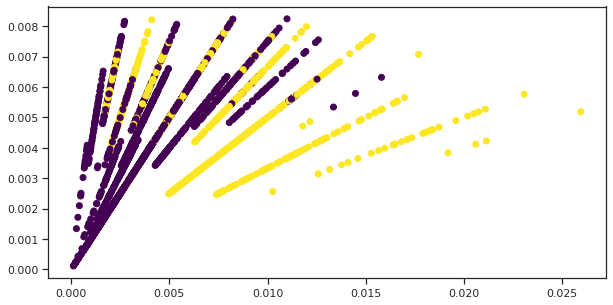

In [ ]:
plt.figure(figsize=(10, 5))  
plt.scatter( data_scaled['frequency_score'],data_scaled['monetary_score'],c=cluster.labels_,cmap='viridis_r') 
#scatter plot against monetary score and frequency score
#there is no much distance between clusters

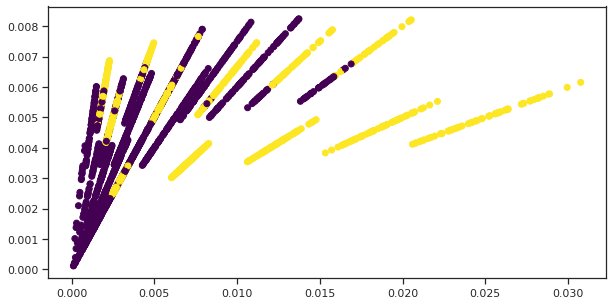

In [ ]:
plt.figure(figsize=(10, 5))  
plt.scatter( data_scaled['recency_score'],data_scaled['monetary_score'],c=cluster.labels_,cmap='viridis_r') 
#scatter plot against monetary score and recency score


Conclusion: K-Means clustering,Pricipal Component Analysis,Hierarchial Clustering are used here to determine the customer segmentation and spending patterns.The unsupervised algorithms are used to analyse the dataset.The dataset has been loaded and pre-processing were done.Missing values,null values,outliers have been treated.RFM analysis has been done to analyse the customer patterns. 
